# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## Data and Setup

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('911.csv')

In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
df.shape

(99492, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [8]:
# Top 5 zipcodes for 911 calls 
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [9]:
# Top 5 townships(twp) for 911 calls
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [10]:
# How many unique titles are there in the 'title' column
df['title'].nunique()

110

# Creating New Features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Let's create a new column called "Reason" that contains this string value.** 

In [11]:
df['reason']=df['title'].apply(lambda x:x.split(':')[0])

In [12]:
# What is the most common Reason for a 911 call?
df['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

<AxesSubplot:xlabel='reason', ylabel='count'>

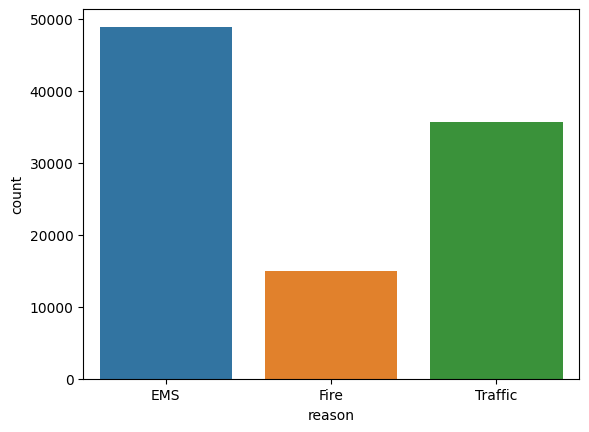

In [13]:
sns.countplot(data=df,x='reason')

In [14]:
type(df['timeStamp'].iloc[0])

str

In [15]:
# I see that these timestamps are still strings. Let's convert the column from strings to DateTime objects.
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [16]:
# Now that the timestamp column are DateTime objects, let's create 3 new columns called Hour, Month, and Day of Week.
time = df['timeStamp'].iloc[0]

df['hour'] = df['timeStamp'].apply(lambda time:time.hour)

df['month'] = df['timeStamp'].apply(lambda time:time.month)

df['day_of_week'] = df['timeStamp'].apply(lambda time:time.day_of_week)

In [17]:
# I see that the Day of Week is an integer 0-6. I will take the help of the following dictionary to map the actual string names to the day of the week:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

df['day_of_week'] = df['day_of_week'].map(lambda day: dmap[day])

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

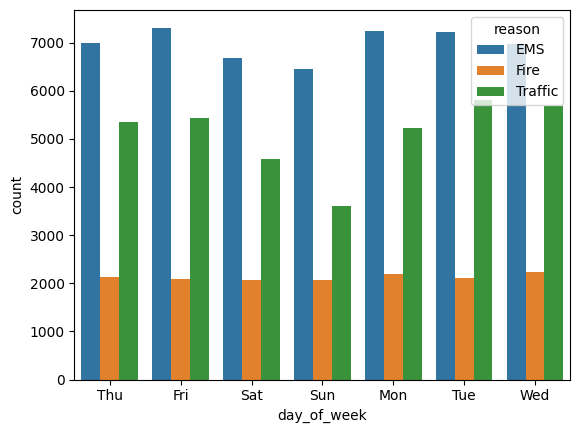

In [18]:
sns.countplot(df,x='day_of_week',hue='reason')

<AxesSubplot:xlabel='month', ylabel='count'>

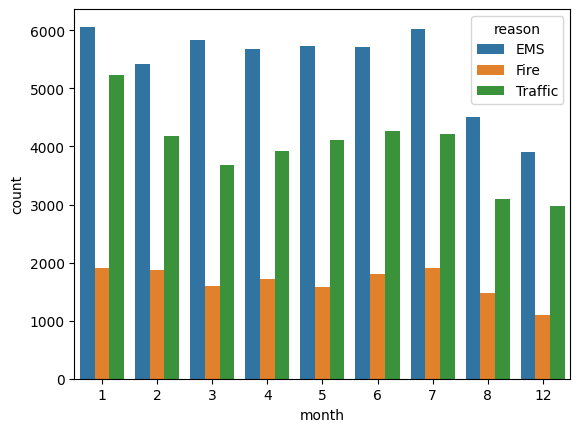

In [19]:
sns.countplot(df,x='month',hue='reason')

In [22]:
# I noticed that it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, 
#possibly a simple line plot that fills in the missing months. 

In [24]:
by_month=df.groupby('month').count()

by_month.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,day_of_week
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


<AxesSubplot:xlabel='month'>

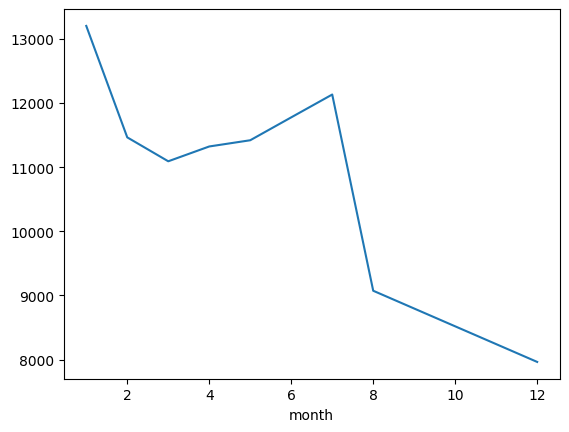

In [25]:
# Now I will create a simple line plot.
by_month['twp'].plot()

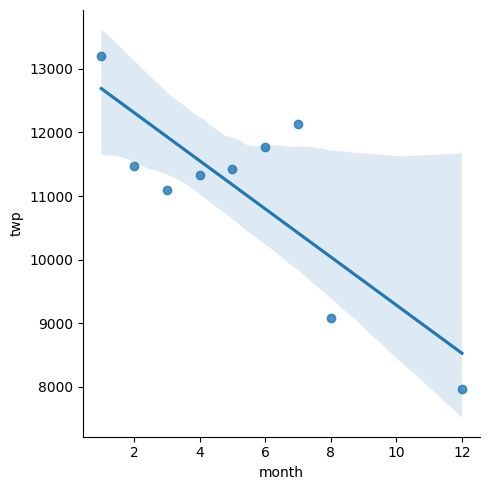

In [26]:
sns.lmplot(by_month.reset_index(),x='month',y='twp')

In [27]:
# I will create a new column called 'Date' that contains the date from the timeStamp column.
df['date']=df['timeStamp'].apply(lambda x: x.date())

In [28]:
# Now let's group this Date column with the count() aggregate and create a plot of counts of 911 calls.
by_date=df.groupby('date').count()

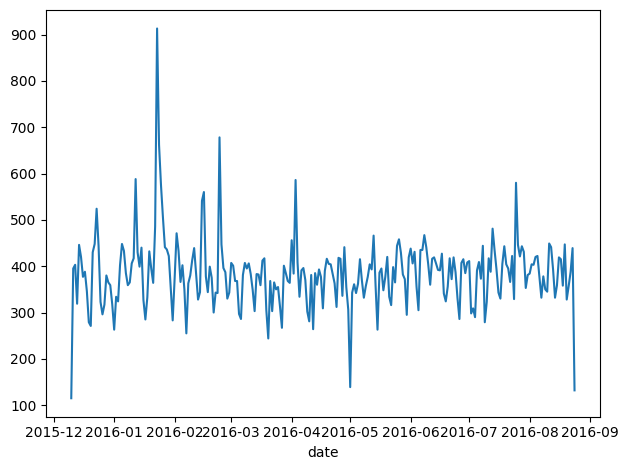

In [29]:
by_date['twp'].plot()
plt.tight_layout()

In [30]:
# Now let's recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call.

Text(0.5, 1.0, 'Traffic')

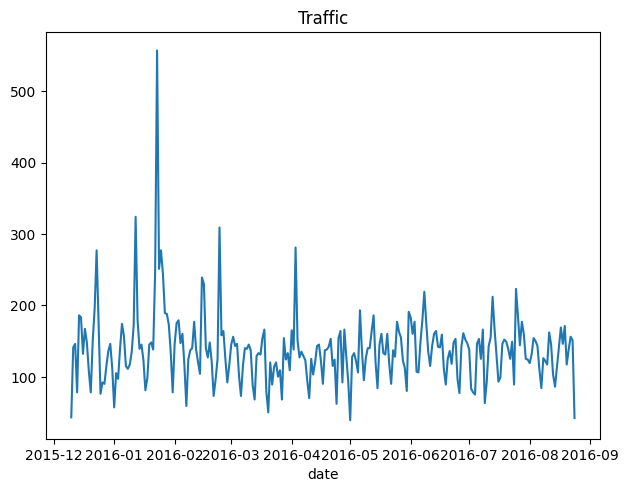

In [31]:
df[df['reason']=='Traffic'].groupby('date').count()['twp'].plot()
plt.tight_layout()
plt.title('Traffic')

Text(0.5, 1.0, 'Fire')

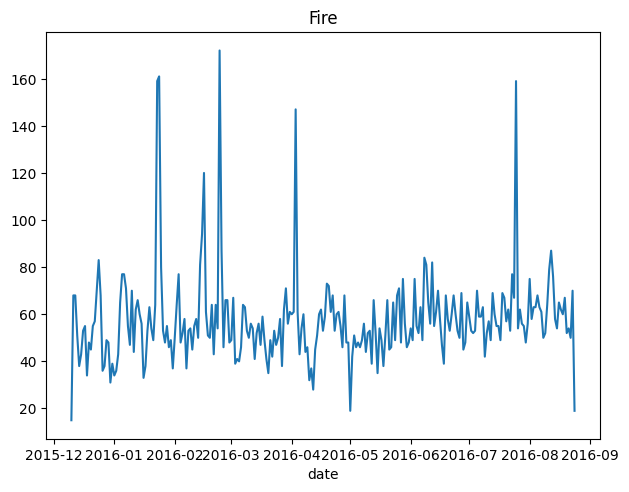

In [32]:
df[df['reason']=='Fire'].groupby('date').count()['twp'].plot()
plt.tight_layout()
plt.title('Fire')

Text(0.5, 1.0, 'EMS')

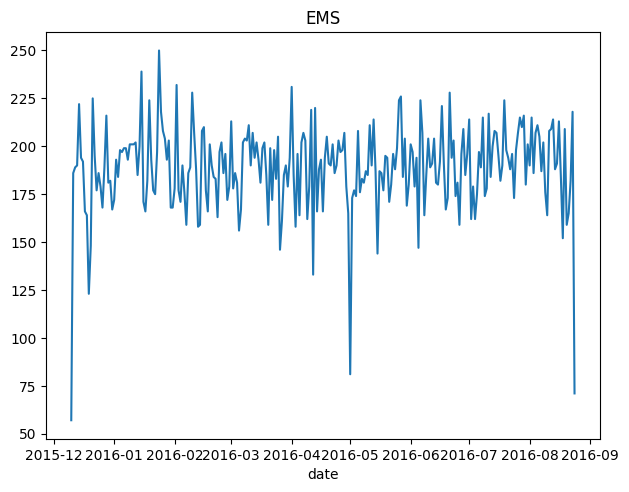

In [33]:
df[df['reason']=='EMS'].groupby('date').count()['twp'].plot()
plt.tight_layout()
plt.title('EMS')

In [34]:
# Now let's create a heatmap for the following
dayhour = df.groupby(by=['day_of_week','hour']).count()['reason'].unstack()
dayhour.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_of_week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


<AxesSubplot:xlabel='hour', ylabel='day_of_week'>

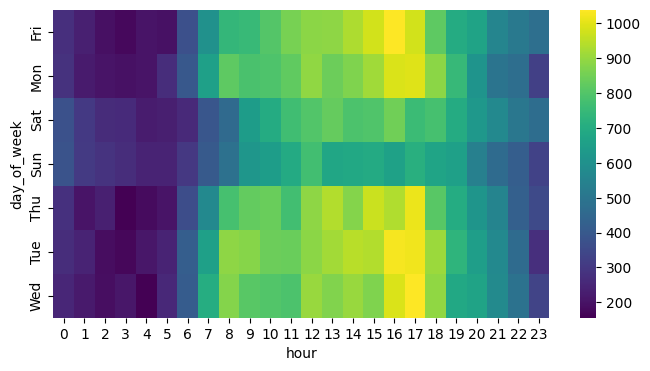

In [37]:
plt.figure(figsize=(8,4))
sns.heatmap(dayhour,cmap='viridis')

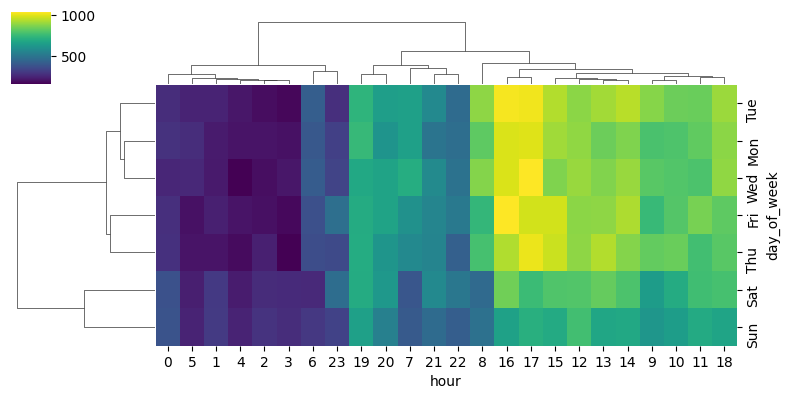

In [40]:
sns.clustermap(dayhour,cmap='viridis',figsize=(8,4))

In [41]:
# Now let's repeat these plots for the Month column. 
daymonth = df.groupby(by=['day_of_week','month']).count()['reason'].unstack()
daymonth.head()

month,1,2,3,4,5,6,7,8,12
day_of_week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<AxesSubplot:xlabel='month', ylabel='day_of_week'>

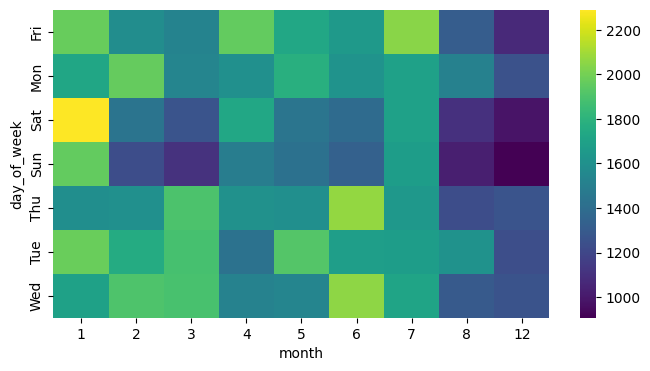

In [42]:
plt.figure(figsize=(8,4))
sns.heatmap(daymonth,cmap='viridis')

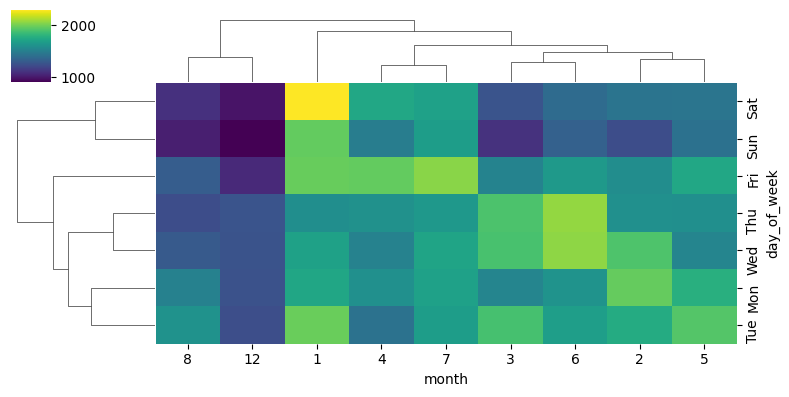

In [43]:
sns.clustermap(daymonth,cmap='viridis', figsize=(8,4))